In [1]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [61]:
TRAIN_PATH = r"TrainData/img/*.h5"
TRAIN_MASK = r'TrainData/mask/*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 14))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [62]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001
        TRAIN_XX[i, :, :] = data
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data

0 TrainData/img\image_1.h5 TrainData/mask\mask_1.h5
1 TrainData/img\image_10.h5 TrainData/mask\mask_10.h5
2 TrainData/img\image_100.h5 TrainData/mask\mask_100.h5
3 TrainData/img\image_1000.h5 TrainData/mask\mask_1000.h5
4 TrainData/img\image_1001.h5 TrainData/mask\mask_1001.h5
5 TrainData/img\image_1002.h5 TrainData/mask\mask_1002.h5
6 TrainData/img\image_1003.h5 TrainData/mask\mask_1003.h5
7 TrainData/img\image_1004.h5 TrainData/mask\mask_1004.h5
8 TrainData/img\image_1005.h5 TrainData/mask\mask_1005.h5
9 TrainData/img\image_1006.h5 TrainData/mask\mask_1006.h5
10 TrainData/img\image_1007.h5 TrainData/mask\mask_1007.h5
11 TrainData/img\image_1008.h5 TrainData/mask\mask_1008.h5
12 TrainData/img\image_1009.h5 TrainData/mask\mask_1009.h5
13 TrainData/img\image_101.h5 TrainData/mask\mask_101.h5
14 TrainData/img\image_1010.h5 TrainData/mask\mask_1010.h5
15 TrainData/img\image_1011.h5 TrainData/mask\mask_1011.h5
16 TrainData/img\image_1012.h5 TrainData/mask\mask_1012.h5
17 TrainData/img\imag

In [41]:
# plt.hist(np.squeeze(TRAIN_YY[2]))
np.squeeze(TRAIN_YY).shape
# np.squeeze(TRAIN_YY[2])

(3799, 128, 128)

In [63]:
data_img = np.unique(np.squeeze(TRAIN_XX), return_counts=True)
data_mask = np.unique(np.squeeze(TRAIN_YY), return_counts=True)

In [56]:
[data_mask[1][0]/(3799*128*128), data_mask[1][1]/(3799*128*128)]

[0.9768199754972525, 0.023180024502747434]

ValueError: X must have 2 or fewer dimensions

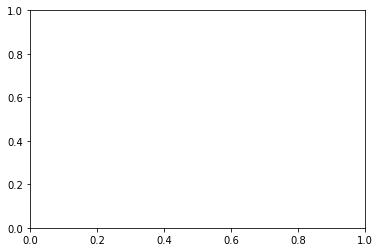

In [69]:
plt.boxplot(np.squeeze(TRAIN_YY))

In [71]:
import qrcode

img = qrcode.make("https://geospatial.sernanp.gob.pe/arcgis_portal/apps/opsdashboard/index.html#/54d268ddfffe48b08dc838184dde8aea")
f = open(r"E:\sernanp\apoyo\edgar\codigoQR_MDD.png", "wb")
img.save(f)
f.close()